In [55]:
#!pip install statsmodels

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss #pruebas de estacionariedad
from statsmodels.tsa.stattools import adfuller

In [2]:
norte = pd.read_csv("Datos_22_24_NORTE_limpios.csv", parse_dates=[0], index_col="date")
noreste = pd.read_csv("Datos_22_24_NORESTE_limpios.csv", parse_dates=[0], index_col="date")
noreste2 = pd.read_csv("Datos_22_24_NORESTE2_limpios.csv", parse_dates=[0], index_col="date")
sureste = pd.read_csv("Datos_22_24_SURESTE_limpios.csv", parse_dates=[0], index_col="date")
centro = pd.read_csv("Datos_22_24_CENTRO_limpios.csv", parse_dates=[0], index_col="date")

In [4]:
#Hace los datos diarios en lugar de por hora, utiliza la media
centro = centro.resample('D').mean() 
print("Dimensiones:", centro.shape)
centro.head().round(2)

Dimensiones: (943, 15)


,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
date,,,,,,,,,,,,,,,
2022-01-01,1.53,5.15,18.90,24.26,25.42,68.58,29.17,705.87,0.0,24.79,4.33,0.15,26.11,5.73,185.29
2022-01-02,1.23,3.76,12.31,16.24,26.65,84.88,11.75,716.48,0.0,25.08,5.18,0.14,14.48,9.77,80.17
2022-01-03,1.20,5.14,12.60,17.99,31.67,41.92,7.23,720.07,0.0,24.96,3.55,0.15,9.79,9.21,77.50
2022-01-04,1.74,20.23,37.89,58.31,18.38,76.00,30.66,714.47,0.0,30.42,5.98,0.14,12.90,4.74,171.33
2022-01-05,1.66,15.48,36.30,51.99,25.10,88.12,27.82,710.17,0.0,24.27,7.10,0.15,19.87,6.28,167.63


# Estacionalización

Se utilizaran las pruebas Augmented Dickey-Fuller (ADF) y Kwiatkowski-Phillips-Schmidt-Shin (KPSS) para evaluar la estacionariedad de las series de tiempo.

**Prueba Augmented Dickey-Fuller (ADF)**
- $H_0$: La serie tiene una raíz unitaria, es decir, **NO** es estacionaria.
- $H_1$: La serie **no** tiene una raíz unitaria, es decir, **SI** es estacionaria.

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS)**
- $H_0$: La serie **SI** es estacionaria (con respecto a una constante o tendencia).
- $H_1$: La serie es **NO** estacionaria (no se mantiene estacionaria en torno a una constante o tendencia).

Se utilizara un nivel de significancia $(\alpha)$ de $0.05$

Para la funcion `kpss()`:

El parametro *regression* es la hipotesis nula del test: {"c", "ct"}
- "c": Hay estacionariedad a **nivel** (Stationary around a constant)
- "ct": Hay estacionariedad de **tendencia** (Stationary around a trend)

Y para la funcion `adfuller()`:

El parametro *regression*: {“c”, ”ct”, ”ctt”, ”n”}
- “c” : constant **only**.
- “ct” : constant **and** trend.

In [11]:
# Función para prueba ADF
def prueba_adf(serie):
    print("-- ADF a nivel --")
    resultado = adfuller(serie, regression = "c")
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).")
    else:
        print("La serie NO es estacionaria a nivel (no rechazamos la hipótesis nula).")
        
    print("\n-- ADF de tendencia --")
    resultado = adfuller(serie, regression = "ct")
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).")
    else:
        print("La serie NO es estacionaria a nivel y tendencia (no rechazamos la hipótesis nula).")

# Función para prueba KPSS
def prueba_kpss(serie):
    print("-- KPSS a nivel --")
    resultado = kpss(serie, regression = "c")
    print(f'Estadístico KPSS: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).")
    else:
        print("La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).")
    
    print("\n-- KPSS de tendencia --")
    resultado = kpss(serie, regression = "ct")
    print(f'Estadístico KPSS: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).")
    else:
        print("La serie SI es estacionaria a tendencia (no rechazamos la hipótesis nula).")

## Region Centro

### PM10

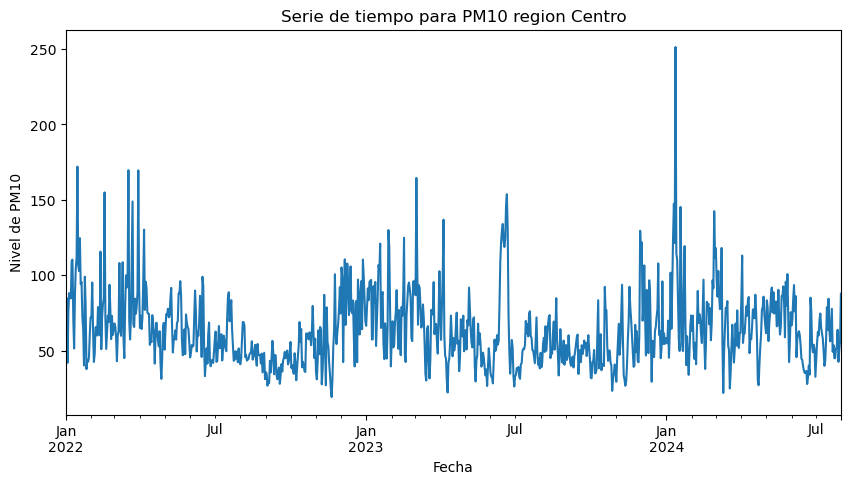

In [31]:
plt.rcParams.update({'figure.figsize': (10,5)})
centro["PM10"].plot()
plt.title("Serie de tiempo para PM10 region Centro")
plt.xlabel("Fecha");
plt.ylabel("Nivel de PM10");

In [7]:
# Prueba ADF para PM10 region centro
prueba_adf(centro["PM10"])

-- ADF a nivel --
Estadístico ADF: -7.239542273265946
Valor p: 1.900198380711834e-10
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -7.240204381014418
Valor p: 4.0174323672875075e-09
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [12]:
# Prueba KPSS para PM10 region centro
prueba_kpss(centro["PM10"])

-- KPSS a nivel --
Estadístico KPSS: 0.183512522805079
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.17559759198015376
Valor p: 0.025335340016538525
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "c")


**Interpretación:** Los resultados indican que:

Prueba ADF:
- La serie es estacionaria tanto a nivel como a nivel y tendencia (rechazamos la hipótesis nula en ambos casos).

Prueba KPSS:
- La serie es estacionaria a nivel (no rechazamos la hipótesis nula).
- La serie no es estacionaria a tendencia (rechazamos la hipótesis nula).

Estos resultados crean una aparente discrepancia en cuanto a la estacionalidad con respecto a la tendencia. Esto sugiere que, dado que la prueba ADF detecta estacionalidad a tendencia y constante, mientras que KPSS no detecta estacionalidad alrededor de una tendencia, podríamos considerar que la tendencia que KPSS no detecta como estacionaria es insignificante y se puede eliminar simplemente al remover una constante.

### CO

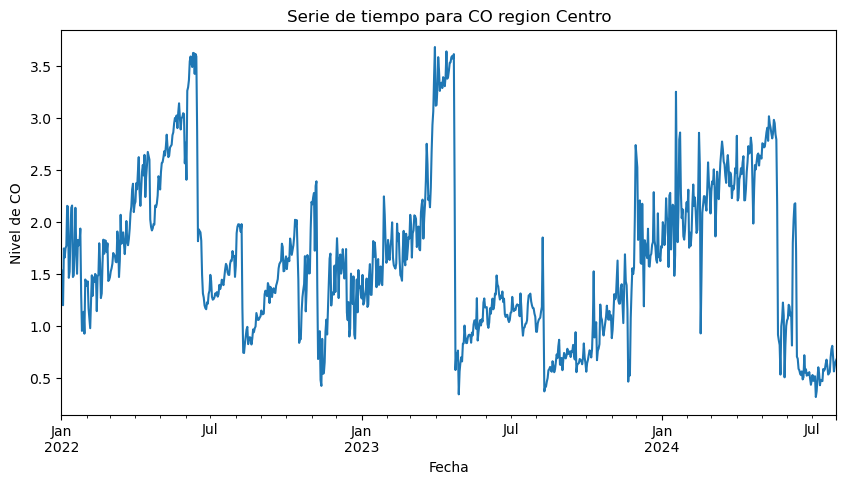

In [39]:
centro["CO"].plot()
plt.title("Serie de tiempo para CO region Centro")
plt.xlabel("Fecha");
plt.ylabel("Nivel de CO");

In [35]:
prueba_adf(centro["CO"])

-- ADF a nivel --
Estadístico ADF: -3.9149686621232855
Valor p: 0.0019274064374656288
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -4.00672449535995
Valor p: 0.008602135546341646
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [36]:
prueba_kpss(centro["CO"])

-- KPSS a nivel --
Estadístico KPSS: 0.2681001257422356
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.1644224848782161
Valor p: 0.03464792926815325
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "c")


Mismos resultados que para el caso de *PM10*, continuamos dado que se asume que la tendencia que KPPS no detecta como estacionaria es insignificante.

### NOX

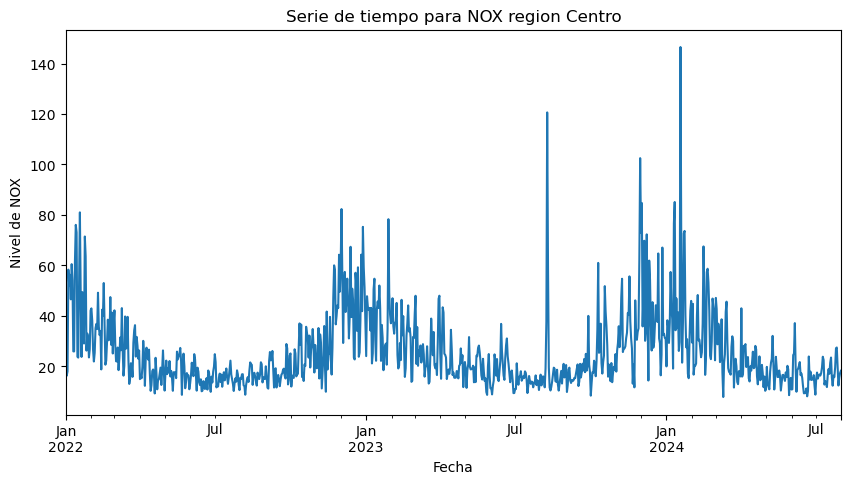

In [40]:
centro["NOX"].plot()
plt.title("Serie de tiempo para NOX region Centro")
plt.xlabel("Fecha");
plt.ylabel("Nivel de NOX");

In [41]:
prueba_adf(centro["NOX"])

-- ADF a nivel --
Estadístico ADF: -3.794109662438077
Valor p: 0.0029681590783902046
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -3.7830409030504484
Valor p: 0.017438994949205366
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [42]:
prueba_kpss(centro["NOX"])

-- KPSS a nivel --
Estadístico KPSS: 0.1841992638132991
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.19271560352308245
Valor p: 0.018731648678844078
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "c")


Mismos resultados que para el caso de *PM10* y *CO*, continuamos dado que se asume que la tendencia que KPPS no detecta como estacionaria es insignificante.

### Resto de las columnas

In [58]:
centro.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF', 'RH',
       'SO2', 'SR', 'TOUT', 'WSR', 'WDR'],
      dtype='object')

In [59]:
for column in centro.columns:
    if column not in ['PM10','CO','NOX']:
        print(f"--{column}--")
        prueba_adf(centro[column])
        prueba_kpss(centro[column])
        print("\n\n")

--NO--
-- ADF a nivel --
Estadístico ADF: -5.617488225860813
Valor p: 1.1653838594264145e-06
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -5.621631879714851
Valor p: 1.3186583520627775e-05
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.2152072715337063
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.18738503178419258
Valor p: 0.02073061308092778
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--NO2--
-- ADF a nivel --
Estadístico ADF: -3.55074543154473
Valor p: 0.006775570406624585
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -3.5116539645988043
Valor p: 0.038160267146919606
Valores Críticos:
La

/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statisti

Estadístico ADF: -8.441718391321112
Valor p: 6.830626784232123e-12
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.48073831191323413
Valor p: 0.046004884704226555
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.06656544572857617
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a tendencia (no rechazamos la hipótesis nula).



--SO2--
-- ADF a nivel --
Estadístico ADF: -3.038018786724642
Valor p: 0.03149325454972761
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -4.174503920442229
Valor p: 0.004890428494061803
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 2.631855501804646
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (r

/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statist

CENTRO NO ESTACIONARIAS: O3, RAINF, RH, SO2, SR, TOUT, WSR

## Region Sureste

In [62]:
for column in sureste.columns:
        print(f"--{column}--")
        prueba_adf(sureste[column])
        prueba_kpss(sureste[column])
        print("\n\n")

--CO--
-- ADF a nivel --
Estadístico ADF: -3.93674553571669
Valor p: 0.0017804608677651108
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -3.906200807441314
Valor p: 0.011896771656984783
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 1.4058261013224207
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 1.0392355658815768
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--NO--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -10.412905117197786
Valor p: 1.7848861241844315e-18
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -10.680046837286874
Valor p: 9.290969852099081e-17
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 3.189300668898384
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.9367768227684576
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--NO2--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -10.389619866437473
Valor p: 2.037026694787145e-18
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -10.390313303601694
Valor p: 3.5529906484638536e-16
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.8314919370302681
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.7815022471676906
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--NOX--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -9.998626806579443
Valor p: 1.9103910924066398e-17
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -10.100659007912077
Valor p: 1.4148504458616637e-15
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 1.9004333179861248
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.8731594671152838
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--O3--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -9.364707422888229
Valor p: 7.655441066131018e-16
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -9.373962967797999
Valor p: 5.2743895952566024e-14
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 1.0428701853368243
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.8858352818407689
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--PM10--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -12.474439030600344
Valor p: 3.191459303191366e-23
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -12.485946408352428
Valor p: 6.873229822692952e-20
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.4448651530080608
Valor p: 0.057816744393077255
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.3946629492062494
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--PM2.5--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -13.218686190733827
Valor p: 1.0121125402583481e-24
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -13.22744131349927
Valor p: 7.1086277991116e-21
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.46114139320824526
Valor p: 0.05080112361713567
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.3981662138628038
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--PRS--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -11.86456721644586
Valor p: 6.722799863232075e-22
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -12.003319820712779
Valor p: 3.794298296349358e-19
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.9625478669173302
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.36118422859640326
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--RAINF--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -17.013337054200697
Valor p: 8.559888742790787e-30
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -17.172040601767073
Valor p: 0.0
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.7315529679841405
Valor p: 0.010677002910532682
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.0533000073729915
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a tendencia (no rechazamos la hipótesis nula).



--RH--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -11.405596346925105
Valor p: 7.463275113503286e-21
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -11.530387851229722
Valor p: 2.381765002605962e-18
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.8665692076887697
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.17470522268307795
Valor p: 0.026078981097435037
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--SO2--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")


Estadístico ADF: -8.61548743505664
Valor p: 6.307269624682016e-14
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -9.840307689731333
Valor p: 5.055457920717655e-15
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 7.3159832817479815
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.89104649666378
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--SR--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -9.08335568084626
Valor p: 4.000672144178749e-15
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -9.139957296043056
Valor p: 1.755785301125628e-13
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 1.5978975024910775
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.9153167237774305
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--TOUT--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -6.899267078276555
Valor p: 1.294617554677453e-09
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -6.929283101468128
Valor p: 2.0411434165228255e-08
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.9682715196959747
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.8153427436977447
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--WSR--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -9.38482333668736
Valor p: 6.803611811567268e-16
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -9.512613989324029
Valor p: 2.6062784813000373e-14
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 2.180127742740032
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 1.042470559087836
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).



--WDR--
-- ADF a nivel --


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "c")
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")


Estadístico ADF: -14.122903515197848
Valor p: 2.407392038453087e-26
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -14.123076933156558
Valor p: 8.558338522504135e-22
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).
-- KPSS a nivel --
Estadístico KPSS: 0.5335367362485819
Valor p: 0.03411334769176083
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.5238176857950544
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).





/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado = kpss(serie, regression = "ct")
